<a href="https://colab.research.google.com/github/Priangshu-18/Movie-Recommendation-App/blob/main/Movie_Recommendation_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk scikit-learn pandas numpy -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
movies_data = pd.read_csv('/content/movies.csv')

In [ ]:
movies_data.shape

(5088, 24)

In [ ]:
movies_data.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5088 entries, 0 to 5087
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5088 non-null   int64  
 1   budget                5088 non-null   int64  
 2   genres                5060 non-null   object 
 3   homepage              1803 non-null   object 
 4   id                    5088 non-null   int64  
 5   keywords              4635 non-null   object 
 6   original_language     5088 non-null   object 
 7   original_title        5088 non-null   object 
 8   overview              5085 non-null   object 
 9   popularity            5088 non-null   float64
 10  production_companies  5088 non-null   object 
 11  production_countries  5088 non-null   object 
 12  release_date          5087 non-null   object 
 13  revenue               5088 non-null   int64  
 14  runtime               5086 non-null   float64
 15  spoken_languages     

In [ ]:
# filter the required columns for recommendation
required_columns = ['genres', 'keywords', 'overview', 'title']

movies_data = movies_data[required_columns]

In [ ]:
movies_data.shape

(5088, 4)

In [ ]:
movies_data.head(2)

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5088 entries, 0 to 5087
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    5060 non-null   object
 1   keywords  4635 non-null   object
 2   overview  5085 non-null   object
 3   title     5088 non-null   object
dtypes: object(4)
memory usage: 159.1+ KB


In [ ]:
movies_data = movies_data.dropna().reset_index(drop=True)

In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4631 entries, 0 to 4630
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4631 non-null   object
 1   keywords  4631 non-null   object
 2   overview  4631 non-null   object
 3   title     4631 non-null   object
dtypes: object(4)
memory usage: 144.8+ KB


In [ ]:
movies_data['combined'] = movies_data['genres'] + ' ' + movies_data['keywords'] + ' ' + movies_data['overview']

In [ ]:
movies_data.head(2)

,genres,keywords,overview,title,Combined,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Action Adventure Fantasy Science Fiction cultu...,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,Adventure Fantasy Action ocean drug abuse exot...


In [ ]:
data = movies_data[['title', 'combined']]

In [ ]:
data.head(2)

,title,combined
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...


In [ ]:
# WordCloud for movie comtent
combined_text = " ".join(movies_data['combined'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

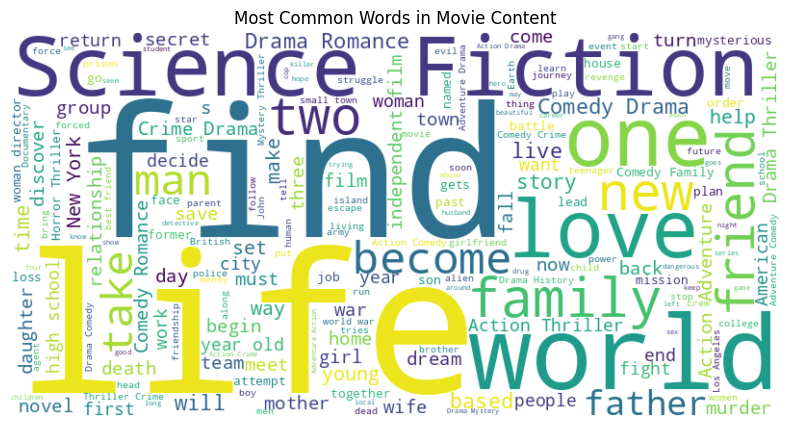

In [ ]:
# WordCloud to visualize the most common words in the movie content
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Movie Content')
plt.show()

In [ ]:
# Download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
def preprocess_test(text):
  # removing special characters and numbers
  text = re.sub(r"[^a-zA-Z\s]", "", text)
  # convert to lowercase
  text = text.lower()
  # tokenize and remove stopwords
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  # join the tokens back into a string
  text = " ".join(tokens)
  return text

In [ ]:
# Apply preprocessing to the movie content
data['cleaned_text'] = data['combined'].apply(preprocess_test)

In [ ]:
data.head(2)

In [ ]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [ ]:
# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)